## Data pull, parsing and preliminary modeling
#### CS109a - Sam, Luke, Jake, Jeremy
#### Chicago Food Inspection Forecasting
#### Last Updated: 11/28/16

In [1]:
from download import main

In [104]:
import datetime
import optparse
import requests
import numpy as np
import pandas as pd
from math import radians, cos, sin, asin, sqrt
from sys import exit
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
main(date=datetime.datetime.strptime('01/01/2010', '%m/%d/%Y'), export=True)

Fetching data beginning 2010-01-01.
136974 records received. Finding businesses...
Succeeded!
Succeeded!
Succeeded!
Succeeded!
Succeeded!
Succeeded!
Succeeded!
Succeeded!
Succeeded!
{u'errorCode': u'query.soql.type-mismatch', u'message': u'Query coordinator error: query.soql.type-mismatch; Type mismatch for #IN, is text; position: Map(row -> 1, column -> 2784, line -> "SELECT * WHERE `license_number` IN (\'1820865\',\'1619259\',\'2042643\',\'1820627\',\'1771894\',\'8085\',\'2088691\',\'2088692\',\'2088693\',\'2088695\',\'2088696\',\'2240915\',\'2240917\',\'2443436\',\'2240918\',\'25179\',\'25174\',\'25176\',\'1681317\',\'1954173\',\'1717915\',\'2103970\',\'1842888\',\'1144531\',\'1227415\',\'2397791\',\'2084445\',\'16308\',\'2069477\',\'2069473\',\'16301\',\'16300\',\'16303\',\'16305\',\'1444085\',\'1444088\',\'1141842\',\'1092321\',\'2378636\',\'69645\',\'1873335\',\'2364154\',\'2364151\',\'2156746\',\'2156747\',\'1352154\',\'21211\',\'21215\',\'2411791\',\'1858\',\'1142576\',\'81024\

/Users/lucasfarewell/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


,dba_name,facility_type,inspection_date,inspection_type,inspection_id,violations,latitude,license_,longitude,results,...,creation_date,num_sanitation_in_police_dist,index,district,crime_count_by_district,date,near_x,near_y,point_crime_count,point_sanit_count
0,TRATTORIA ISABELLA,Restaurant,2012-04-06,Canvass,1184245,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.886294,1842843,-87.642644,Pass,...,NaT,NaN,28568.0,12.0,41.0,2012-04-06,41.870507,-87.636333,7.470854e-05,NaN
1,GREAT AMERICAN BAGEL,Restaurant,2014-10-09,Canvass,1441489,"16. FOOD PROTECTED DURING STORAGE, PREPARATION...",41.939911,1898062,-87.660833,Fail,...,NaT,NaN,44617.0,19.0,30.0,2014-10-09,41.945785,-87.636333,1.527434e-05,NaN
2,ALBANY PARK COMMUNITY CENTER,Children's Services Facility,2015-09-09,License,1575282,"41. PREMISES MAINTAINED FREE OF LITTER, UNNECE...",41.970113,2215517,-87.713443,Pass,...,2015-09-09,7.0,39908.0,17.0,23.0,2015-09-09,41.983425,-87.691952,1.603135e-05,0.000022
3,Pritzker,School,2010-12-02,Canvass,469703,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.907025,25871,-87.677796,Pass w/ Conditions,...,NaT,NaN,335.0,1.0,30.0,2010-12-02,41.908146,-87.691952,2.113810e-04,NaN
4,DOCKS,Restaurant,2014-01-14,Short Form Complaint,1296751,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.736380,1445981,-87.627509,Pass,...,2014-01-14,1.0,14084.0,6.0,47.0,2014-01-14,41.719949,-87.636333,2.340951e-05,NaN
5,BABA'S FAMOUS STEAK & LEMONADE,Restaurant,2010-10-14,Canvass,417230,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.802134,1954887,-87.621203,Pass,...,NaT,NaN,2808.0,2.0,31.0,2010-10-14,41.795228,-87.636333,2.888950e-04,0.000000
6,JERSEY MIKE'S,Restaurant,2014-04-11,Canvass,1439241,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.892453,2120697,-87.622491,Pass,...,2014-04-11,3.0,41914.0,18.0,31.0,2014-04-11,41.908146,-87.636333,3.014362e-05,0.000083
7,YOSHI'S CAFE,Restaurant,2013-10-22,Canvass Re-Inspection,1369883,24. DISH WASHING FACILITIES: PROPERLY DESIGNED...,41.941696,2115,-87.649177,Pass,...,2013-10-22,4.0,44265.0,19.0,29.0,2013-10-22,41.945785,-87.636333,2.065912e-05,0.000075
8,DIPPIN' DOTS ICE CREAM,Mobile Food Preparer,2013-08-14,License Re-Inspection,1360265,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.887434,2220008,-87.681849,Pass,...,2013-08-14,3.0,29063.0,12.0,42.0,2013-08-14,41.870507,-87.691952,6.012352e-05,0.000020
9,THE WATERFORD A NURSING & REHABILITATION CENTRE,Long Term Care,2010-03-02,Canvass,176448,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",42.017571,43055,-87.665385,Pass w/ Conditions,...,NaT,NaN,50502.0,24.0,23.0,2010-03-02,42.021064,-87.691952,3.570408e-04,0.000000


First we load in the data:

In [126]:
data = pd.read_csv('DOWNLOADED_DATA.csv')

Now we check out the columns:

These functions build binary indicators for license types 

In [127]:
def fail(result):
    if 'Fail' in result:
        return 0
    else:
        return 1
    
    
def grocery_store(facility_type):
    if 'Grocery Store' == facility_type:
        return 1
    else:
        return 0

In [128]:
data['result_binary'] = [fail(result) for result in data.results]
data['grocery'] = [grocery_store(facility_type) for facility_type in data.facility_type]

In [133]:
license_cols = list(data.columns[17:-12])
license_result_cols = license_cols + ['result_binary']



pass_rate = []
count = []
for col in license_cols:
    pass_rate.append(data[data[col] == 1].result_binary.mean())
    pass_rate.append(data[data[col] == 1].result_binary.mean())

In [134]:
license_counts = data[license_cols].sum().sort_values()

In [135]:
top_n = 20
top_license_counts = license_counts.ix[license_counts.index[-top_n:]]

In [136]:

top_license_counts_cols = list(license_counts.index[-top_n:])

pass_rate = []
for col in top_license_counts_cols:
    pass_rate.append(data[data[col] == 1].result_binary.mean())
    
top_license_pass_rate = pd.Series(data = np.array(pass_rate),index=top_license_counts.index)

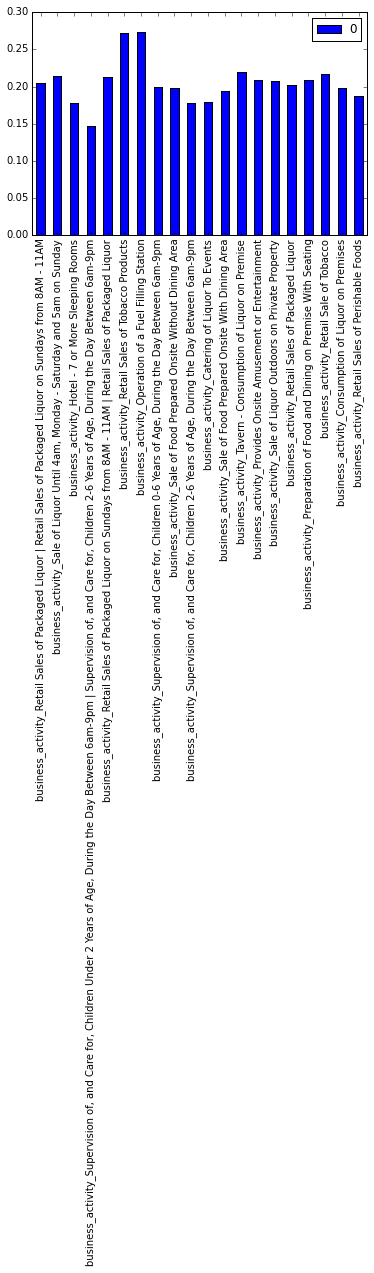

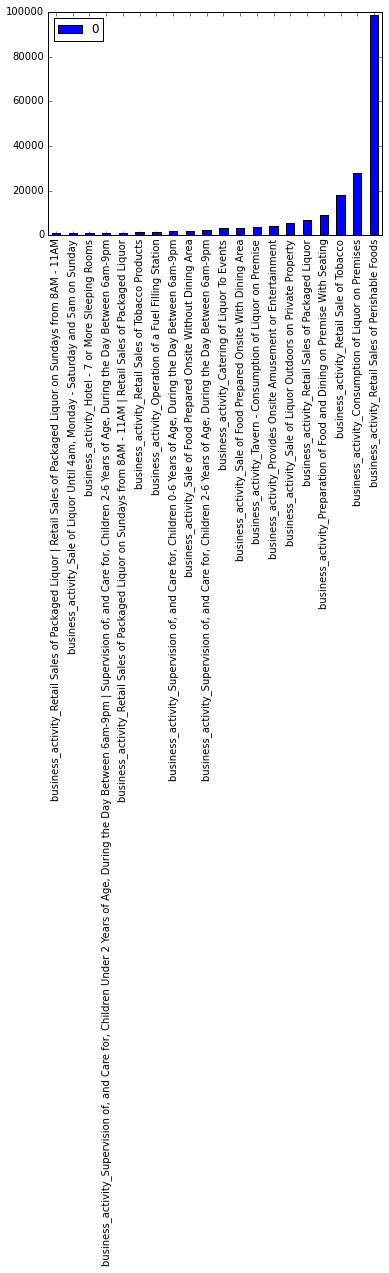

In [137]:
pd.DataFrame(1-top_license_pass_rate).plot(kind='bar')
plt.show()
pd.DataFrame(top_license_counts).plot(kind='bar')
plt.show()

In [138]:
keep_n=20
all_license_cols = list(data.columns[17:-12])
for col in list(license_counts.index[-keep_n:]):
    all_license_cols.remove(col)

drop_license_cols = all_license_cols
data = data.drop(drop_license_cols,axis=1)

In [139]:
data['inspection_date'] = pd.to_datetime(data['inspection_date'])
#data['license_start_date'] = pd.to_datetime(data['license_start_date'])
#data['date_issued'] = pd.to_datetime(data['date_issued'])
data['creation_date'] = pd.to_datetime(data['creation_date'])

In [140]:
weather_data_ohare = pd.read_csv('Ohare Weather Data.csv')
weather_data_midway = pd.read_csv('Midway Weather Data.csv')
weather_data_ohare['inspection_date'] = [datetime.datetime.strptime(str(DATE), '%Y%m%d') for DATE in weather_data_ohare.DATE]
weather_data_midway['inspection_date'] = [datetime.datetime.strptime(str(DATE), '%Y%m%d') for DATE in weather_data_midway.DATE]
temp_data_ohare = weather_data_ohare.set_index(['inspection_date'])[['TMAX']]
temp_data_midway = weather_data_midway.set_index(['inspection_date'])[['TMAX']]

temp_data_ohare['TMAX_3DayAvg'] = pd.rolling_mean(temp_data_ohare.TMAX,3)
temp_data_ohare['TMAX_10DayAvg'] = pd.rolling_mean(temp_data_ohare.TMAX,10)
temp_data_ohare['TMAX_30DayAvg'] = pd.rolling_mean(temp_data_ohare.TMAX,30)

temp_data_midway['TMAX_3DayAvg'] = pd.rolling_mean(temp_data_midway.TMAX,3)
temp_data_midway['TMAX_10DayAvg'] = pd.rolling_mean(temp_data_midway.TMAX,10)
temp_data_midway['TMAX_30DayAvg'] = pd.rolling_mean(temp_data_midway.TMAX,30)
data = data.join(temp_data_midway, on='inspection_date')

/Users/lucasfarewell/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
/Users/lucasfarewell/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/lucasfarewell/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
/Users/lucasfarewell/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
/Users/lucasfarewell/anaconda/lib/py

In [141]:
import re

critical_flags = re.compile(r'(\bCRITICAL\b)',flags = re.IGNORECASE)
serious_flags = re.compile(r'(\bSERIOUS\b)',flags = re.IGNORECASE)
citation_flags = re.compile(r'(\bCITATION\b)',flags = re.IGNORECASE)
violation_flags = re.compile(r'(\bVIOLATION\b)',flags = re.IGNORECASE)
minor_flags = re.compile(r'(\bMINOR\b)',flags = re.IGNORECASE)
corrected_flags = re.compile(r'(\bCORRECTED\b)',flags = re.IGNORECASE)


In [142]:
violations_count = []
citations_count = []
critical_count = []
serious_count = []
minor_count = []
corrected_count = []

LOG_EVERY_N = 10000


  
for index in data.index:
    text = data.ix[index].violations
    
    if type(text) == type(' '):
        violations_count.append(violation_flags.subn('',text)[1])
        citations_count.append(citation_flags.subn('',text)[1])
        critical_count.append(critical_flags.subn('',text)[1])
        serious_count.append(serious_flags.subn('',text)[1])
        minor_count.append(minor_flags.subn('',text)[1])
        corrected_count.append(corrected_flags.subn('',text)[1])


    else:
        violations_count.append(float('nan'))
        citations_count.append(float('nan'))
        critical_count.append(float('nan'))
        serious_count.append(float('nan'))
        minor_count.append(float('nan'))
        corrected_count.append(float('nan'))

        
    if (index % LOG_EVERY_N) == 0:
        print index


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000


In [143]:
data['violations_count'] = violations_count
data['citations_count'] = citations_count
data['critical_count'] = critical_count
data['serious_count'] = serious_count
data['minor_count'] = minor_count
data['corrected_count'] = corrected_count




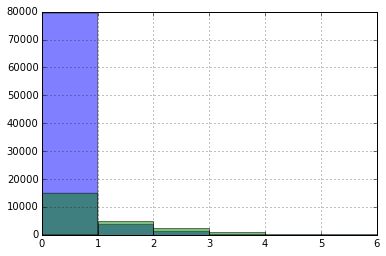

In [144]:
# compare pass rates for different violation counts
bins = np.linspace(0,6,7)
data[data.result_binary == 1].citations_count.hist(normed=False,alpha=0.5,bins=bins)
data[data.result_binary == 0].citations_count.hist(normed=False,alpha=0.5,bins=bins)

In [147]:
def prev_inspection_features(data,inspection_id,date):
    current_inspection = data.ix[data[data.inspection_id==inspection_id].index[0]]
    
    all_inspections = data[data.license_ == current_inspection.license_]
    
    previous_inspections = all_inspections[all_inspections.inspection_date < date]
    if len(previous_inspections) >= 1:
        last_inspection_index = previous_inspections.inspection_date.sort_values().index[-1]
        fraction = previous_inspections.result_binary.mean()
        count = previous_inspections.result_binary.count()
        last = previous_inspections.result_binary[last_inspection_index]
        
        #if type(pd.to_datetime('nan')) != type(current_inspection.license_start_date):
        #    license_age = current_inspection.inspection_date - current_inspection.license_start_date
        #    license_age = license_age.days
        #    if license_age <= 0:
        #        license_age = 0
        #else:
        #    license_age = float('nan')
            
        time_since_last = current_inspection.inspection_date - previous_inspections.ix[last_inspection_index].inspection_date
        time_since_last = time_since_last.days
        
        prev_violations = previous_inspections.violations_count[last_inspection_index]
        prev_citations = previous_inspections.citations_count[last_inspection_index]
        prev_critical = previous_inspections.critical_count[last_inspection_index]
        prev_serious = previous_inspections.serious_count[last_inspection_index]
        prev_minor = previous_inspections.minor_count[last_inspection_index]
        prev_corrected = previous_inspections.corrected_count[last_inspection_index]

        
        
        
    else:
        fraction = float('nan')
        count = 0
        last = float('nan')
        license_age = float('nan')
        time_since_last = float('nan')
        prev_violations = float('nan')
        prev_citations = float('nan')
        prev_critical = float('nan')
        prev_serious = float('nan')
        prev_minor = float('nan')
        prev_corrected = float('nan')

        
        
        
        
    return np.array([count,
                     fraction,
                     last,
                     #license_age,
                     time_since_last,
                     prev_violations,
                     prev_citations,
                     prev_critical,
                     prev_serious,
                     prev_minor,
                     prev_corrected])
    
    


In [148]:
#previous_inspection_features = np.zeros((len(data.index),11))

previous_inspection_features = np.zeros((len(data.index),10))


LOG_EVERY_N = 10000
for index in data.index:
    previous_inspection_features[index,:] = prev_inspection_features(data,data.ix[index].inspection_id,data.ix[index].inspection_date)
    if (index % LOG_EVERY_N) == 0:
        print index


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000


In [149]:
    
data['previous_count'] = previous_inspection_features[:,0]
data['previous_fraction'] = previous_inspection_features[:,1]
data['previous_result'] = previous_inspection_features[:,2]
#data['license_age'] = previous_inspection_features[:,3]
data['time_since_last_inspection'] = previous_inspection_features[:,3]
data['previous_violations'] = previous_inspection_features[:,4]
data['previous_citations'] = previous_inspection_features[:,5]
data['previous_critical'] = previous_inspection_features[:,6]
data['previous_serious'] = previous_inspection_features[:,7]
data['previous_minor'] = previous_inspection_features[:,8]
data['previous_corrected'] = previous_inspection_features[:,9]



In [150]:
for col in data.columns:
    print col

dba_name
facility_type
inspection_date
inspection_type
inspection_id
violations
latitude
license_
longitude
results
risk
zip
police_district
precinct
account_number
site_number
ward_precinct
business_activity_Catering of Liquor To Events
business_activity_Consumption of Liquor on Premises
business_activity_Hotel - 7 or More Sleeping Rooms
business_activity_Operation of a Fuel Filling Station
business_activity_Preparation of Food and Dining on Premise With Seating
business_activity_Provides Onsite Amusement or Entertainment
business_activity_Retail Sale of Tobacco
business_activity_Retail Sales of Packaged Liquor
business_activity_Retail Sales of Packaged Liquor on Sundays from 8AM - 11AM | Retail Sales of Packaged Liquor
business_activity_Retail Sales of Packaged Liquor | Retail Sales of Packaged Liquor on Sundays from 8AM - 11AM
business_activity_Retail Sales of Perishable Foods
business_activity_Retail Sales of Tobacco Products
business_activity_Sale of Food Prepared Onsite With Dini

In [152]:
data.to_csv('data_built_features.csv',index=False)

In [ ]:

#adjust number of buckets using np.linspace ----------------->
yedges = np.linspace(data.longitude.min(),data.longitude.max(),6)
xedges = np.linspace(data.latitude.min(),data.latitude.max(),6)

x = np.array(data.latitude)
y = np.array(data.longitude)

x1 = np.array(data[data.result_binary == 1].latitude)
y1 = np.array(data[data.result_binary == 1].longitude)

x0 = np.array(data[data.result_binary == 0].latitude)
y0 = np.array(data[data.result_binary == 0].longitude)


hist0, xedges, yedges = np.histogram2d(x0, y0, (xedges, yedges))
hist1, xedges, yedges = np.histogram2d(x1, y1, (xedges, yedges))

hist = hist0/(hist1+hist0)
hist_count = hist1+hist0

xidx = np.clip(np.digitize(x, xedges), 0, hist.shape[0]-1)
yidx = np.clip(np.digitize(y, yedges), 0, hist.shape[1]-1)

c = hist[xidx, yidx]
plt.scatter(x, y, c=c)

plt.show()

sorted_index = np.argsort(hist.reshape(1,-1))

print hist_count.reshape(1,-1)[0][sorted_index[0]]
print hist.reshape(1,-1)[0][sorted_index[0]]

In [ ]:
data['bin_index'] = hist.shape[1]*yidx + xidx

fig = plt.figure(figsize=(10,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4


data.groupby('bin_index').count().result_binary.plot(kind='bar', color='red', ax=ax, width=width, position=1)
data.groupby('bin_index').mean().result_binary.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)


plt.show()

In [ ]:
result_index = data.groupby('license_description').mean().result_binary.sort_values().index
data.groupby('license_description').mean().result_binary.sort_values()[result_index]

In [ ]:

fig = plt.figure(figsize=(10,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4


data.groupby('license_description').count().result_binary[result_index].plot(kind='bar', color='red', ax=ax, width=width, position=1)
data.groupby('license_description').mean().result_binary.sort_values()[result_index].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)


plt.show()



In [ ]:
top_50 = data.groupby('facility_type').count().result_binary.sort_values().index[-50:]

In [ ]:
data.groupby('facility_type').mean().result_binary[top_50].sort_values()

top_50count_mean_sorted_index = data.groupby('facility_type').mean().result_binary[top_50].sort_values().index



In [ ]:

fig = plt.figure(figsize=(10,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4


data.groupby('facility_type').mean().result_binary[top_50].sort_values().plot(kind='bar', color='red', ax=ax, width=width, position=1)
data.groupby('facility_type').count().result_binary[top_50count_mean_sorted_index].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)


plt.show()


## Modeling
#### All shit above is Luke's work

### Get data and desired features

In [105]:
data = pd.read_csv('../data_built_features.csv')

In [106]:
data.shape

(136974, 69)

In [102]:
# for col in data.columns.values:
#     print col

In [232]:
# we should return to this and check which covariates we've selected 

cols = ['inspection_date',
        'facility_type',
        'latitude',
        'longitude',
        'results',
        'risk',
        'business_activity_Catering of Liquor To Events',
        'business_activity_Consumption of Liquor on Premises',
        'business_activity_Hotel - 7 or More Sleeping Rooms',
        'business_activity_Operation of a Fuel Filling Station',
        'business_activity_Preparation of Food and Dining on Premise With Seating',
        'business_activity_Provides Onsite Amusement or Entertainment',
        'business_activity_Retail Sale of Tobacco',
        'business_activity_Retail Sales of Packaged Liquor',
        'business_activity_Retail Sales of Packaged Liquor on Sundays from 8AM - 11AM | Retail Sales of Packaged Liquor',
        'business_activity_Retail Sales of Packaged Liquor | Retail Sales of Packaged Liquor on Sundays from 8AM - 11AM',
        'business_activity_Retail Sales of Perishable Foods',
        'business_activity_Retail Sales of Tobacco Products',
        'business_activity_Sale of Food Prepared Onsite With Dining Area',
        'business_activity_Sale of Food Prepared Onsite Without Dining Area',
        'business_activity_Sale of Liquor Outdoors on Private Property',
        'business_activity_Sale of Liquor Until 4am, Monday - Saturday and 5am on Sunday',
        'business_activity_Supervision of, and Care for, Children 0-6 Years of Age, During the Day Between 6am-9pm',
        'business_activity_Supervision of, and Care for, Children 2-6 Years of Age, During the Day Between 6am-9pm',
        'business_activity_Supervision of, and Care for, Children Under 2 Years of Age, During the Day Between 6am-9pm | Supervision of, and Care for, Children 2-6 Years of Age, During the Day Between 6am-9pm',
        'business_activity_Tavern - Consumption of Liquor on Premise',
        'point_crime_count',
        'point_sanit_count',
        'result_binary',
        'TMAX',
        'TMAX_3DayAvg',
        'TMAX_10DayAvg',
        'TMAX_30DayAvg',
        'previous_count',
        'previous_fraction',
        'previous_result',
        'time_since_last_inspection',
        'previous_violations',
        'previous_citations',
        'previous_critical',
        'previous_serious',
        'previous_minor',
        'previous_corrected']

print data[cols].shape
print data.shape

# select specific features
data_sub = data[cols]
# what would happen if we dropped NaNs
print data_sub.dropna(axis=0, how='any').shape

(136974, 43)
(136974, 69)
(66957, 43)


In [233]:
# convert string to datetime to be safe
data_sub['inspection_date'] = pd.to_datetime(data_sub['inspection_date'])

print data_sub['inspection_date'].min()
print data_sub['inspection_date'].max()


2010-01-04 00:00:00
2016-12-02 00:00:00


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Imputation and encoding 

In [234]:
# non-KNN approach:
# replace null values with feature mean (quantitative) or feature mode (qualitative)
# for column in data_sub.columns:
#     if (data_sub[column].unique().shape[0] < 8) or (data_sub[column].dtype == np.dtype('object')):
#         data_sub[column].fillna(value = data_sub[column].mode()[0], inplace = True)
#     else:
#         data_sub[column].fillna(value = data_sub[column].mean(), inplace = True)

# check no null values
nan_cnt = 0
for i, column in enumerate(data_sub.columns):
    print i, column, np.array(data_sub[column].isnull()).sum()
    nan_cnt = nan_cnt + np.array(data_sub[column].isnull()).sum()
    
print 'total cells:', data_sub.size
print 'nan_cnt:', nan_cnt
print 'ratio for sam:', nan_cnt / float(data_sub.size)



0 inspection_date 0
1 facility_type 4470
2 latitude 492
3 longitude 492
4 results 0
5 risk 63
6 business_activity_Catering of Liquor To Events 8257
7 business_activity_Consumption of Liquor on Premises 8257
8 business_activity_Hotel - 7 or More Sleeping Rooms 8257
9 business_activity_Operation of a Fuel Filling Station 8257
10 business_activity_Preparation of Food and Dining on Premise With Seating 8257
11 business_activity_Provides Onsite Amusement or Entertainment 8257
12 business_activity_Retail Sale of Tobacco 8257
13 business_activity_Retail Sales of Packaged Liquor 8257
14 business_activity_Retail Sales of Packaged Liquor on Sundays from 8AM - 11AM | Retail Sales of Packaged Liquor 8257
15 business_activity_Retail Sales of Packaged Liquor | Retail Sales of Packaged Liquor on Sundays from 8AM - 11AM 8257
16 business_activity_Retail Sales of Perishable Foods 8257
17 business_activity_Retail Sales of Tobacco Products 8257
18 business_activity_Sale of Food Prepared Onsite With Dining

In [239]:
# how should we handle the historical count data?
# there's no optimal solution: either (1) impute, biasing that they wouldn't have done well 
# or (2) set to 0, biasing that they would've done well? We'll set to 0 for simplicity.

print 'count of obs for which previous_count == 0:', data_sub[data_sub['previous_count'] == 0.0].shape[0]
print 'this corresponds with number of nans for previous_fraction, previous_result, time_since_last_inspection, which is what we\'d expect'

# set all these to 0 then
hist_cols = ['previous_fraction',
            'previous_result',
            'time_since_last_inspection',
            'previous_violations',
            'previous_citations',
            'previous_critical',
            'previous_serious',
            'previous_minor',
            'previous_corrected']

for hist_col in hist_cols:
    data_sub.loc[data_sub['previous_count'] == 0.0, hist_col] = data_sub.loc[data_sub['previous_count'] == 0.0, hist_col].fillna(value = 0)
    
print '\n here are NaN counts after this step: \n'
for i, column in enumerate(data_sub.columns):
    print i, column, np.array(data_sub[column].isnull()).sum()
    
print '37-42 still have a uniform number of null values because they had no text from the inspection, so nothing to scrape'

count of obs for which previous_count == 0: 31599
this corresponds with number of nans for previous_fraction, previous_result, time_since_last_inspection, which is what we'd expect

 here are NaN counts after this step: 

0 inspection_date 0
1 facility_type 4470
2 latitude 492
3 longitude 492
4 results 0
5 risk 63
6 business_activity_Catering of Liquor To Events 8257
7 business_activity_Consumption of Liquor on Premises 8257
8 business_activity_Hotel - 7 or More Sleeping Rooms 8257
9 business_activity_Operation of a Fuel Filling Station 8257
10 business_activity_Preparation of Food and Dining on Premise With Seating 8257
11 business_activity_Provides Onsite Amusement or Entertainment 8257
12 business_activity_Retail Sale of Tobacco 8257
13 business_activity_Retail Sales of Packaged Liquor 8257
14 business_activity_Retail Sales of Packaged Liquor on Sundays from 8AM - 11AM | Retail Sales of Packaged Liquor 8257
15 business_activity_Retail Sales of Packaged Liquor | Retail Sales of Packa

In [291]:
# obs with no null values
print 'count of obs with no null values:', data_sub.shape[0] - data_sub.isnull().any(axis = 1).sum()
print 'count of features with no null values:', data_sub.shape[1] - data_sub.isnull().any(axis = 0).sum()

count of obs with no null values: 79775
count of features with no null values: 7


In [297]:
# features with no null values we can use to impute
data_sub.isnull().any(axis = 0)[data_sub.isnull().any(axis = 0) == False].index.values

array(['inspection_date', 'results', 'result_binary', 'previous_count',
       'previous_fraction', 'previous_result', 'time_since_last_inspection'], dtype=object)

In [313]:
# so that the imputer has enough predictors, to work with, fill in risk by mean / mode approach since only 63 obs have nulls

data_sub['risk'].fillna(value = data_sub['risk'].mode()[0], inplace = True)

# check
print 'number of null values in risk:', data_sub['risk'].isnull().sum()

number of null values in risk: 0


In [331]:
# KNN 
from sklearn.neighbors import NearestNeighbors

In [373]:
# have to encode the data first... but facility_type is annoying to do...
print data_sub.facility_type.value_counts()[0:10]

take_types = data_sub.facility_type.value_counts()[0:50].index.values

Restaurant                         89285
Grocery Store                      18649
School                              8584
Daycare (2 - 6 Years)               2229
Bakery                              1970
Daycare Above and Under 2 Years     1505
Children's Services Facility        1325
Catering                             802
Long Term Care                       787
Daycare Combo 1586                   752
Name: facility_type, dtype: int64


In [ ]:
# why don't we just take the first fifty for now 
# this takes awhile... a faster approach?
for i, row in data_sub[['facility_type']].iterrows():
    if row.values not in take_types:
        data_sub.loc[i, 'facility_type'] = 'Other'
    else:
        continue

In [539]:
# check response
print 'Useless response count:', sum((data_sub.results != 'Pass') & (data_sub.results != 'Pass w/ Conditions') & (data_sub.results != 'Fail'))
indices = (data_sub.results == 'Pass') | (data_sub.results == 'Pass w/ Conditions') | (data_sub.results == 'Fail')
data_sub = data_sub[indices]

Useless response count: 0


In [540]:
# risk
indices = (data_sub.risk == 'Risk 1 (High)') | (data_sub.risk == 'Risk 2 (Medium)') | (data_sub.risk == 'Risk 3 (Low)')
data_sub = data_sub[indices]

In [541]:
data_sub = data_sub.reset_index(drop=True)

In [624]:
# have to these encode first
data_sub_encoded = pd.DataFrame({})
for column in data_sub.columns:
#     if (data_sub[column].unique().shape[0] < 8) or data_sub[column].dtype == np.dtype('object'):
    if (data_sub[column].dtype == np.dtype('object')) & (column not in ['results']):
        encoding = pd.get_dummies(data_sub[column])
        data_sub_encoded = pd.concat([data_sub_encoded, encoding], axis = 1)
    else:
#         data_sub_encoded = pd.concat([data_sub_encoded, data_sub[[column]].astype(float)], axis = 1)
        data_sub_encoded = pd.concat([data_sub_encoded, data_sub[[column]]], axis = 1)

In [625]:
# train data are observations that are complete
# test data (which we wish to impute) are observations that are incomplete
train = data_sub_encoded[np.logical_not(data_sub_encoded.isnull().any(axis = 1).values)]
test = data_sub_encoded[data_sub_encoded.isnull().any(axis = 1).values]

In [626]:
# reset indices because we've dropped rows, NearestNeighbors was returning wrong indices because they weren't reset
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [574]:
# dont actually have to split x and y since we specify what features we're imputing on in impute_cols
# x_train = train.drop(['result_binary', 'results'], axis = 1) 
# x_test = test.drop(['result_binary', 'results'], axis = 1) 

In [627]:
data_sub.isnull().any(axis = 0)[data_sub.isnull().any(axis = 0) == False].index.values

array(['inspection_date', 'facility_type', 'results', 'risk',
       'result_binary', 'previous_count', 'previous_fraction',
       'previous_result', 'time_since_last_inspection'], dtype=object)

In [628]:
# should be using 'inspection_date', 'facility_type' too but i will return to this, was frustrated with the encoding!

impute_cols = ['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', 'previous_count', 'previous_fraction',
       'previous_result', 'time_since_last_inspection']

In [629]:
knn = NearestNeighbors(n_neighbors = 5)
knn.fit(train[impute_cols]) 

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [689]:
# return k nearest neighbors based on features we have for all observations
# then fill in other values using these nearest neighbors 

import math
from scipy import stats

for i, row in test.iterrows(): # for each observation with incomplete features
    ind = knn.kneighbors(X = row[impute_cols].values.reshape(1,-1), return_distance=False)[0] # return indices of nearest neighbors with complete features
    for col in test.columns.values[row.isnull().values]: # for each feature that're NaNs    
        train_vals = np.array(train.loc[ind, col]) # get vals from nearest neighbors for this col
        if train[col].unique().shape[0] <= 2: # if indicator 
            test.loc[i, col] = stats.mode(train_vals)[0][0] # fill w/ mode
        else:
            test.loc[i, col] = train_vals.mean() # fill w/ mean
    if (i % 500 == 0):
        print 'finished iteration:', i

finished iteration: 0
finished iteration: 500
finished iteration: 1000
finished iteration: 1500
finished iteration: 2000
finished iteration: 2500
finished iteration: 3000
finished iteration: 3500
finished iteration: 4000
finished iteration: 4500
finished iteration: 5000
finished iteration: 5500
finished iteration: 6000
finished iteration: 6500
finished iteration: 7000
finished iteration: 7500
finished iteration: 8000
finished iteration: 8500
finished iteration: 9000
finished iteration: 9500
finished iteration: 10000
finished iteration: 10500
finished iteration: 11000
finished iteration: 11500
finished iteration: 12000
finished iteration: 12500
finished iteration: 13000
finished iteration: 13500
finished iteration: 14000
finished iteration: 14500
finished iteration: 15000
finished iteration: 15500
finished iteration: 16000
finished iteration: 16500
finished iteration: 17000
finished iteration: 17500
finished iteration: 18000
finished iteration: 18500
finished iteration: 19000
finished i

In [645]:
# this won't work, apply flattens the thing
# import math
# from scipy import stats

# def impute_row(row):
#     ind = knn.kneighbors(X = row[impute_cols].values.reshape(1, -1), return_distance=False)[0]
#     for col in test.columns.values[row.isnull().values]: # for each feature that're NaNs    
#         train_vals = np.array(train.loc[ind, col])
#         if train[col].unique().shape[0] <= 2:
#             row[col] = stats.mode(train_vals)[0][0]
#         else:
#             row[col] = train_vals.mean()

# test = test.apply(impute_row, axis = 1)


In [691]:
data_ready = pd.concat([train, test], axis = 0)
data_ready = data_ready.reset_index(drop=True)

In [702]:
reorder = ['inspection_date','result_binary','results','point_crime_count', 'point_sanit_count',
      'latitude', 'longitude','TMAX','TMAX_3DayAvg', 'TMAX_10DayAvg', 'TMAX_30DayAvg',
     'Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)',
        'previous_count','previous_fraction', 'previous_result',
       'time_since_last_inspection', 'previous_violations',
       'previous_citations', 'previous_critical', 'previous_serious',
       'previous_minor', 'previous_corrected',
        "1023 CHILDERN'S SERVICES FACILITY",
       "1023-CHILDREN'S SERVICES FACILITY", 'ASSISTED LIVING', 'BANQUET',
       'BANQUET HALL', 'Bakery', 'CAFETERIA', 'CHURCH', 'CHURCH KITCHEN',
       'CONVENIENCE', 'CONVENIENCE STORE', 'CULINARY SCHOOL', 'Catering',
       "Children's Services Facility", 'DAYCARE', 'Daycare (2 - 6 Years)',
       'Daycare (2 Years)', 'Daycare (Under 2 Years)',
       'Daycare Above and Under 2 Years', 'Daycare Combo 1586',
       'GAS STATION', 'GAS STATION/MINI MART', 'GROCERY/RESTAURANT',
       'Golden Diner', 'Grocery Store', 'Hospital', 'KIOSK',
       'LIVE POULTRY', 'Liquor', 'Long Term Care', 'Mobile Food Dispenser',
       'Mobile Food Preparer', 'Navy Pier Kiosk', 'Other',
       'PRIVATE SCHOOL', 'RESTAURANT/BAR', 'RESTAURANT/GROCERY STORE',
       'ROOF TOPS', 'ROOFTOP', 'Restaurant', 'STADIUM', 'STORE', 'School',
       'Shared Kitchen', 'Shared Kitchen User (Long Term)',
       'Shared Kitchen User (Short Term)', 'Shelter', 'Special Event',
       'TAVERN', 'Wholesale', 'convenience store', 
       'business_activity_Catering of Liquor To Events',
       'business_activity_Consumption of Liquor on Premises',
       'business_activity_Hotel - 7 or More Sleeping Rooms',
       'business_activity_Operation of a Fuel Filling Station',
       'business_activity_Preparation of Food and Dining on Premise With Seating',
       'business_activity_Provides Onsite Amusement or Entertainment',
       'business_activity_Retail Sale of Tobacco',
       'business_activity_Retail Sales of Packaged Liquor',
       'business_activity_Retail Sales of Packaged Liquor on Sundays from 8AM - 11AM | Retail Sales of Packaged Liquor',
       'business_activity_Retail Sales of Packaged Liquor | Retail Sales of Packaged Liquor on Sundays from 8AM - 11AM',
       'business_activity_Retail Sales of Perishable Foods',
       'business_activity_Retail Sales of Tobacco Products',
       'business_activity_Sale of Food Prepared Onsite With Dining Area',
       'business_activity_Sale of Food Prepared Onsite Without Dining Area',
       'business_activity_Sale of Liquor Outdoors on Private Property',
       'business_activity_Sale of Liquor Until 4am, Monday - Saturday and 5am on Sunday',
       'business_activity_Supervision of, and Care for, Children 0-6 Years of Age, During the Day Between 6am-9pm',
       'business_activity_Supervision of, and Care for, Children 2-6 Years of Age, During the Day Between 6am-9pm',
       'business_activity_Supervision of, and Care for, Children Under 2 Years of Age, During the Day Between 6am-9pm | Supervision of, and Care for, Children 2-6 Years of Age, During the Day Between 6am-9pm',
       'business_activity_Tavern - Consumption of Liquor on Premise']
data_ready = data_ready[reorder]

In [704]:
# so don't have to rerun the code above
data_ready.to_csv('/Users/jeremywelborn1/Documents/Jeremy/Harvard/Classes/III_Junior/1st_CS109a/fggw/data_ready.csv')

#### Imbalance of class corrections 

In [ ]:
# i think we can just correct this when we construct the sklearn classes, in general

#### Set up models
Logistic
Poly logistic
LDA
QDA
k-NN
Trees (bagging RF, boosting AdaBoost)
SVM

In [741]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest 
from sklearn.svm import SVC

from sklearn.grid_search import GridSearchCV

In [728]:
data = data_ready
# convert to access the year conveniently
data['inspection_date'] = [day.date() for day in data['inspection_date']]

print data['inspection_date'].values.min()
print data['inspection_date'].values.max()

2010-01-04
2016-12-02


In [750]:
train = data[map(lambda d: d.year != 2016, data['inspection_date'].values)] 
test = data[map(lambda d: d.year == 2016, data['inspection_date'].values)] 
x_train = train.drop(['result_binary', 'results'], axis = 1)
y_train = train['result_binary']
x_test = test.drop(['result_binary', 'results'], axis = 1) 
y_test = test['result_binary']

In [ ]:
pd.to_datetime

In [752]:
model = LogReg()
model.fit(x_train.drop(['inspection_date'], axis = 1), y_train)
print model.score(x_test.drop(['inspection_date'], axis = 1), y_test)

0.778744759243


In [753]:
train['result_binary'].value_counts()

1    81388
0    23174
Name: result_binary, dtype: int64

In [ ]:
rf_hyperparams = {'n_estimators': [25,50,75,100],
                  'max_features': range(10, x_train.shape[1], 10), 
                  'max_depth': [1, 2, 3, 4]}   

Cs = map(lambda t: 10**t, range(0, 4))
kernels = ['linear', 'poly', 'rbf']
svm_hyperparams = {'C': Cs, 'kernel': kernels}

In [ ]:
clf = model()
gs_clf = GridSearchCV(clf, param_grid = model_params)
gs_clf.fit(x_train, y_train)
clfs.append(gs_clf.best_estimator_)

#### Create cost function

#### Cross validate using cost function, visualize results

## code below is from baseline model milestone

#### Baseline modeling

In [ ]:
# Simple averaging

simple_avg_classifier = []

for frac in data.previous_fraction:
    if frac > 0.5:
        simple_avg_classifier.append(1)
    elif frac < 0.5:
        simple_avg_classifier.append(1)
    
    else:
        simple_avg_classifier.append(np.random.choice([0,1]))
        
print np.mean(np.array(simple_avg_classifier) == data.result_binary)

In [ ]:
cols = ['results', 
        'result_binary', 
        'risk', 
        'sanit_count', 
        'crime_count', 
        'consumption_license', 
        'tobacco', 
        'grocery', 
        'previous_count',
        'minor_count',
        'previous_fraction', 
        'previous_result', 
        'license_age', 
        'time_since_last_inspection', 
        'previous_violations', 
        'previous_citations', 
        'previous_critical', 
        'previous_serious', 
        'previous_minor', 
        'bin_index']

print data[cols].shape
print data.shape

# select specific features
data_sub = data[cols]
# drop NaN
data_sub = data_sub.dropna(axis=0)

In [ ]:
# check response
print 'Useless response count:', sum((data_sub.results != 'Pass') & (data_sub.results != 'Pass w/ Conditions') & (data_sub.results != 'Fail'))
indices = (data_sub.results == 'Pass') | (data_sub.results == 'Pass w/ Conditions') | (data_sub.results == 'Fail')
data_sub = data_sub[indices]

In [ ]:
# response
y2 = data_sub.result_binary
y3 = data_sub.results
# features
x = data_sub.drop(['result_binary', 'results'], axis = 1) 

# print data_sub.shape, data_sub_x.shape, data_sub_y_2, data_sub_y_3

In [ ]:
# encode
x_encoded = pd.DataFrame({})
for column in x.columns:
    if (x[column].unique().shape[0] < 8) or x[column].dtype == np.dtype('object'):
        encoding = pd.get_dummies(x[column])
        x_encoded = pd.concat([x_encoded, encoding], axis = 1)
    else:
        x_encoded = pd.concat([x_encoded, x[[column]].astype(float)], axis = 1)

In [ ]:
from sklearn import linear_model

baseline = linear_model.LogisticRegression()
baseline.fit(x_encoded, y2)
print baseline.score(x_encoded, y2)

baseline = linear_model.LogisticRegression(solver='newton-cg', multi_class = 'multinomial')
baseline.fit(x_encoded, y3)
print baseline.score(x_encoded, y3)

In [ ]:
# arbitary split
from sklearn.cross_validation import train_test_split as sk_split
test_size = 0.20
x_train, x_test, y2_train, y2_test = sk_split(x_encoded, y2, test_size = test_size)

baseline = linear_model.LogisticRegression()
baseline.fit(x_train, y2_train)
print 'Score:', baseline.score(x_test, y2_test)
print 'Score for passing inspections:', baseline.score(x_train[y2_train == 1], y2_train[y2_train == 1])
print 'Score for non-passing inspections:', baseline.score(x_train[y2_train == 0], y2_train[y2_train == 0])

In [ ]:
# class counts in training set

print 'Count did not pass:', sum(y2_train == 0)
print 'Count did pass:', sum(y2_train == 1)

In [ ]:
# quick fix for imbalance

# takes x_train, y_train and returns a class-balanced x_train, y_train 
# assumes count of class 0 > count of class 1
def subsample(x_train, y_train):
    train = pd.concat([x_train, y_train], axis = 1)

    train_0 = train[y_train == 0]
    train_1 = train[y_train == 1]
    
    train_1_subsample = train_1.sample(train_0.shape[0])
    
    train_subsample = pd.concat([train_1_subsample, train_0], axis = 0)
    
    x_train_subsample = train_subsample.iloc[:, :-1]
    y_train_subsample = train_subsample.iloc[:, -1]
    
    return x_train_subsample, y_train_subsample
    
## test subsampling algorithm with same simple classifier
x_train_sub, y2_train_sub = subsample(x_train, y2_train)

print x_train_sub.shape
print y2_train_sub.shape


In [ ]:
baseline_cls_corr = linear_model.LogisticRegression()
baseline_cls_corr.fit(x_train_sub, y2_train_sub)
print 'Score:', baseline_cls_corr.score(x_test, y2_test)
print 'Score for passing inspections:',baseline_cls_corr.score(x_test[y2_test == 1], y2_test[y2_test == 1])
print 'Score for non-passing inspections:', baseline_cls_corr.score(x_test[y2_test == 0], y2_test[y2_test == 0])